In [66]:
import numpy as np
import os
import matplotlib.pyplot as plt
import struct
%matplotlib inline

In [79]:
train_img_path = "mnist/train-images-idx3-ubyte"
train_lbl_path = "mnist/train-labels-idx1-ubyte"

test_img_path = "mnist/t10k-images-idx3-ubyte"
test_lbl_path = "mnist/t10k-labels-idx1-ubyte"

In [80]:
with open(train_lbl_path, 'rb') as train_label:
    magic, num = struct.unpack(">II", train_label.read(8))
    train_label = np.fromfile(train_label, dtype=np.int8)

with open(test_lbl_path, 'rb') as test_label:
    magic, num = struct.unpack(">II", test_label.read(8))
    test_label = np.fromfile(test_label, dtype=np.int8)

In [84]:
with open(train_img_path, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    train_img = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_label), -1) / 255
    
with open(test_img_path, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    test_img = np.fromfile(fimg, dtype=np.uint8).reshape(len(test_label), -1) /255

In [106]:
def plot_number(image):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image.reshape(rows, cols), cmap='gray')
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')

is: 0


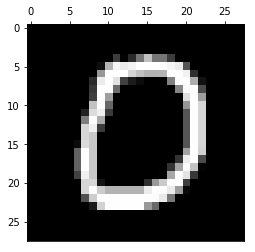

In [166]:
plot_number(test_img[10])
print("is:", test_label[10])

In [167]:
tar = test_img[10]

In [168]:
tar.shape

(784,)

In [169]:
d_1 = np.abs(train_img - tar)

In [170]:
d_2 = d_1 ** 2

In [171]:
d_3 = d_2.sum(axis=1)

In [172]:
d_3.shape

(60000,)

In [173]:
from collections import Counter
k_N = Counter(train_label[d_3.argsort()][:10])

In [174]:
sorted(k_N, key=lambda x:k_N[x])[-1]

0

In [180]:
def kNN_classify(data, label, img):
    d_1 = np.abs(data - img)
    d_2 = d_1 ** 2
    d_3 = d_2.sum(axis=1)
    k_N = Counter(label[d_3.argsort()][:10])
    return sorted(k_N, key=lambda x:k_N[x])[-1]

Error occured! Real number is : 4 come back with 0
Error occured! Real number is : 2 come back with 1
Error occured! Real number is : 8 come back with 2
Error occured! Real number is : 2 come back with 7


KeyboardInterrupt: 

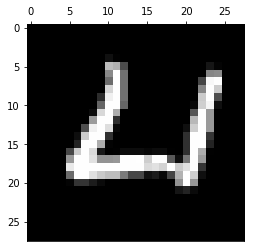

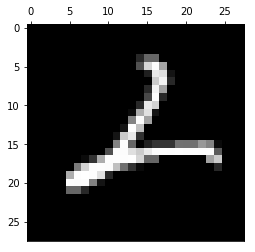

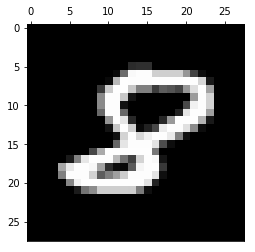

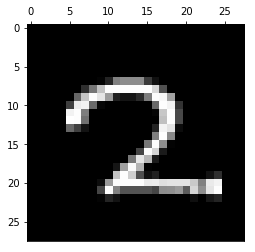

In [182]:
error_count = 0
acc_rate = 1 - 1.0 * error_count / len(test_img)
for i in range(len(test_img)):
    pred = kNN_classify(train_img, train_label, test_img[i])
    if(pred != test_label[i]):
        error_count += 1
        print("Error occured! Real number is :", test_label[i], "come back with", pred)
        plot_number(test_img[i])
    acc_rate = 1 - 1.0 * error_count / len(test_img)
    if((i+1) % 500 == 0):
        print("%d / %d tested, %f accuracy" % {i+1, len(test_img), acc_rate})